# Evaluate model parameters

This notebook loads precomputed results for evaluating the general settings of the proposed CNN model, corresponding to the __first part of Section 4__ in the paper. In particular, we compare different _input frame rates_, numbers of _context frames, and _CNN kernel shapes_, tested on the Schubert Winterreise Dataset (SWD).

&copy; Johannes Zeitler (johannes.zeitler@fau.de) and Christof Weiß (christof.weiss@audiolabs-erlangen.de), 2020/21

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas

### 1. Load proposed CNN

In [2]:
path_results = os.path.join('PrecomputedResults', 'musicalCNN_Schubert_eval.csv')
data = pandas.read_csv(path_results)
data['fMeasure'] = 2*data['Recall']*data['Precision']/(data['Recall']+data['Precision']) 
pandas.set_option('display.max_rows', 10)
data

,Name,Time,cqtRate,L,numFilt,size_filt1,zerosWeight,loss,accuracy,binary_accuracy,binary_crossentropy,cosine_similarity,Precision,Recall,fMeasure
0,musicalCNN_Jo1_Schubert_r10_L5_C5_nF10_sF5_zer...,20201030-181538,10,5,10,5,0.3,0.210942,0.388589,0.911631,0.245484,0.799504,0.777052,0.837250,0.806028
1,musicalCNN_Jo1_Schubert_r10_L5_C5_nF10_sF5_zer...,20201030-182503,10,5,10,5,0.4,0.220503,0.391779,0.914166,0.225547,0.808697,0.805200,0.802816,0.804007
2,musicalCNN_Jo1_Schubert_r10_L5_C5_nF10_sF5_zer...,20201030-183414,10,5,10,5,0.5,0.220979,0.392209,0.911989,0.220979,0.809014,0.833936,0.747517,0.788365
3,musicalCNN_Jo1_Schubert_r10_L5_C5_nF10_sF9_zer...,20201030-184320,10,5,10,9,0.3,0.200687,0.388896,0.912694,0.237466,0.806015,0.767130,0.864223,0.812787
4,musicalCNN_Jo1_Schubert_r10_L5_C5_nF10_sF9_zer...,20201030-185230,10,5,10,9,0.4,0.216029,0.390000,0.916416,0.219876,0.811558,0.812199,0.804984,0.808575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,musicalCNN_Jo1_Schubert_r50_L75_C5_nF20_sF9_ze...,20201031-143023,50,75,20,9,0.4,0.183079,0.390041,0.927909,0.191208,0.834889,0.821696,0.858592,0.839739
104,musicalCNN_Jo1_Schubert_r50_L75_C5_nF20_sF9_ze...,20201031-144747,50,75,20,9,0.5,0.187157,0.381007,0.928104,0.187157,0.838468,0.842465,0.827997,0.835168
105,musicalCNN_Jo1_Schubert_r50_L75_C5_nF20_sF15_z...,20201031-150527,50,75,20,15,0.3,0.174674,0.398531,0.924258,0.210319,0.828334,0.793981,0.885434,0.837217
106,musicalCNN_Jo1_Schubert_r50_L75_C5_nF20_sF15_z...,20201031-152501,50,75,20,15,0.4,0.183576,0.375782,0.928299,0.193359,0.833551,0.819456,0.864529,0.841389


### 2. Impact of the frame rate

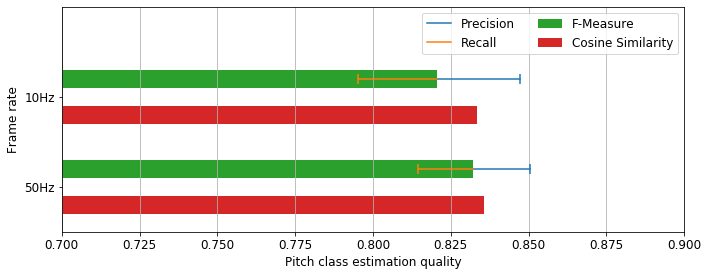

In [3]:
# Color settings
colFM = 'tab:green'
colCS = 'tab:red'
colPrec = 'tab:blue'
colRec = 'tab:orange'

# Figure settings
dxFM = .2
dxCS = -.2
height = .2
marker='|'
s = 100
figsize = (10,4)

d_cqtRate10 = data[(data['L']==15) & (data['numFilt']==20) & (data['size_filt1'] == 15) & (data['zerosWeight']==0.5)]
d_cqtRate50 = data[(data['L']==75) & (data['numFilt']==20) & (data['size_filt1'] == 15) & (data['zerosWeight']==0.5)]

plotData = {'50Hz': d_cqtRate50,
            '10Hz': d_cqtRate10}

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=figsize)

for x, key in enumerate(plotData.keys()):
    
    if x is 0:
        labelFM = 'F-Measure'
        labelCS = 'Cosine Similarity'
        labelPrec = 'Precision'
        labelRec = 'Recall'
    else:
        labelFM=None
        labelCS=None
        labelPrec=None
        labelRec=None
    
    d = plotData[key]
    plt.barh(x+dxFM, d['fMeasure'], height=height, color=colFM, zorder=0, label=labelFM)
    plt.scatter(d['Precision'], x+dxFM, marker=marker, s=s, color=colPrec, zorder=2)
    plt.scatter(d['Recall'], x+dxFM, marker=marker, s=s, color=colRec, zorder=2)
    plt.plot([d['fMeasure'].item(), d['Precision'].item()], [x+dxFM,x+dxFM], color=colPrec, zorder=2, label=labelPrec)
    plt.plot([d['fMeasure'].item(), d['Recall'].item()], [x+dxFM,x+dxFM], color=colRec, zorder=2, label=labelRec)
    plt.barh(x+dxCS, d['cosine_similarity'], height=height, color=colCS, label=labelCS)

plt.yticks(np.arange(len(plotData)), plotData.keys())
plt.legend(ncol=2, loc='upper right')
plt.xlim([.7, .9])
plt.ylim([-.5, len(plotData)])
plt.grid(axis='x')

plt.ylabel('Frame rate')
plt.xlabel('Pitch class estimation quality')

plt.tight_layout()

### 3. Impact of the number of context frames

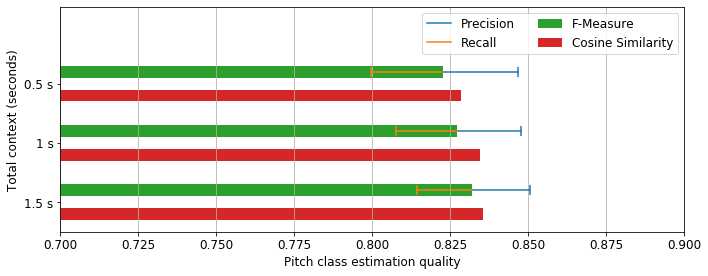

In [4]:
d_context05 = data[(data['L']==25) & (data['numFilt']==20) & (data['size_filt1'] == 15) & (data['zerosWeight']==0.5)]
d_context1 = data[(data['L']==51) & (data['numFilt']==20) & (data['size_filt1'] == 15) & (data['zerosWeight']==0.5)]
d_context15 = data[(data['L']==75) & (data['numFilt']==20) & (data['size_filt1'] == 15) & (data['zerosWeight']==0.5)]

plotData = {'1.5 s': d_context15,
            '1 s': d_context1,
            '0.5 s': d_context05}
plt.figure(figsize=figsize)

for x, key in enumerate(plotData.keys()):
    
    if x is 0:
        labelFM = 'F-Measure'
        labelCS = 'Cosine Similarity'
        labelPrec = 'Precision'
        labelRec = 'Recall'
    else:
        labelFM=None
        labelCS=None
        labelPrec=None
        labelRec=None
    
    d = plotData[key]
    plt.barh(x+dxFM, d['fMeasure'], height=height, color=colFM, zorder=0, label=labelFM)
    plt.scatter(d['Precision'], x+dxFM, marker=marker, s=s, color=colPrec, zorder=2)
    plt.scatter(d['Recall'], x+dxFM, marker=marker, s=s, color=colRec, zorder=2)
    plt.plot([d['fMeasure'].item(), d['Precision'].item()], [x+dxFM,x+dxFM], color=colPrec, zorder=2, label=labelPrec)
    plt.plot([d['fMeasure'].item(), d['Recall'].item()], [x+dxFM,x+dxFM], color=colRec, zorder=2, label=labelRec)
    plt.barh(x+dxCS, d['cosine_similarity'], height=height, color=colCS, label=labelCS)

plt.yticks(np.arange(len(plotData)), plotData.keys())
plt.legend(ncol=2, loc='upper right')
plt.xlim([.7, .9])
plt.ylim([-.5, len(plotData)+.3])
plt.grid(axis='x')

plt.ylabel('Total context (seconds)')
plt.xlabel('Pitch class estimation quality')

plt.tight_layout()

### 4. Impact of the kernel shape (first layer, "prefiltering")

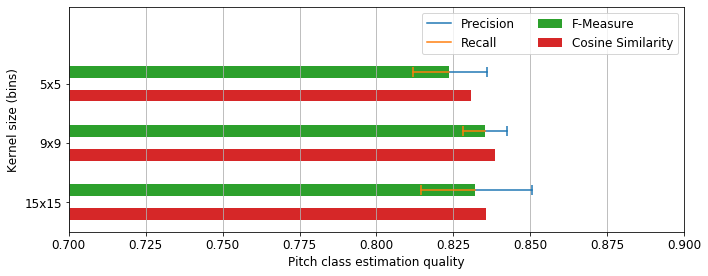

In [5]:
d_size5 = data[(data['L']==75) & (data['numFilt']==20) & (data['size_filt1'] == 5) & (data['zerosWeight']==0.5)]
d_size9 = data[(data['L']==75) & (data['numFilt']==20) & (data['size_filt1'] == 9) & (data['zerosWeight']==0.5)]
d_size15 = data[(data['L']==75) & (data['numFilt']==20) & (data['size_filt1'] == 15) & (data['zerosWeight']==0.5)]

plotData = {'15x15': d_size15,'9x9': d_size9, '5x5': d_size5,}
np.savez('fig_5-2-a_data.npz', plotData=plotData)

plt.figure(figsize=figsize)

for x, key in enumerate(plotData.keys()):
    
    if x is 0:
        labelFM = 'F-Measure'
        labelCS = 'Cosine Similarity'
        labelPrec = 'Precision'
        labelRec = 'Recall'
    else:
        labelFM=None
        labelCS=None
        labelPrec=None
        labelRec=None
    
    d = plotData[key]
    plt.barh(x+dxFM, d['fMeasure'], height=height, color=colFM, zorder=0, label=labelFM)
    plt.scatter(d['Precision'], x+dxFM, marker=marker, s=s, color=colPrec, zorder=2)
    plt.scatter(d['Recall'], x+dxFM, marker=marker, s=s, color=colRec, zorder=2)
    plt.plot([d['fMeasure'].item(), d['Precision'].item()], [x+dxFM,x+dxFM], color=colPrec, zorder=2, label=labelPrec)
    plt.plot([d['fMeasure'].item(), d['Recall'].item()], [x+dxFM,x+dxFM], color=colRec, zorder=2, label=labelRec)
    plt.barh(x+dxCS, d['cosine_similarity'], height=height, color=colCS, label=labelCS)

plt.yticks(np.arange(len(plotData)), plotData.keys())
plt.legend(ncol=2, loc='upper right')
plt.xlim([.7, .9])
plt.ylim([-.5, len(plotData)+.3])
plt.grid(axis='x')

plt.ylabel('Kernel size (bins)')
plt.xlabel('Pitch class estimation quality')

plt.tight_layout()